In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [5]:
# To read the CSV file using pandas into a DataFrame
csv_file = "Telco-Customer-Churn-Data.csv"
df = pd.read_csv(csv_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df.shape)
df.head(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
# To find missing values in the DataFrame
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# To find non-numeric missing vales
# To convert the 'TotalCharges' column to numeric, treating errors as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count the number of missing values in each column
missing_value_count = df.isnull().sum()

# Display the counts of missing values
print(missing_value_count)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# To filter out the rows with missing values (NaN) in 'TotalCharges' column
filtered_data = df[np.isnan(df['TotalCharges'])]
filtered_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# To drop the columns with the missing vales
df.dropna(inplace = True)

In [11]:
# To recheck if any missing value remain
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# To drop columns that are not required
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#data Visualization

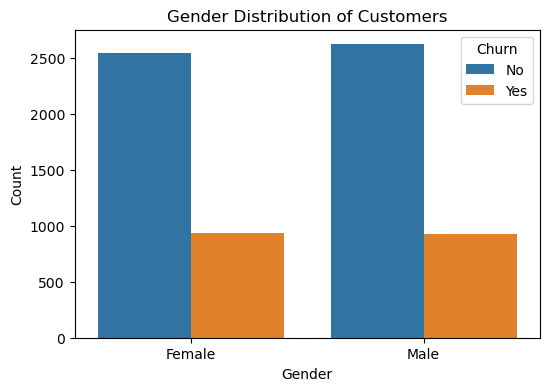

In [13]:
#Countplot of Gender:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()



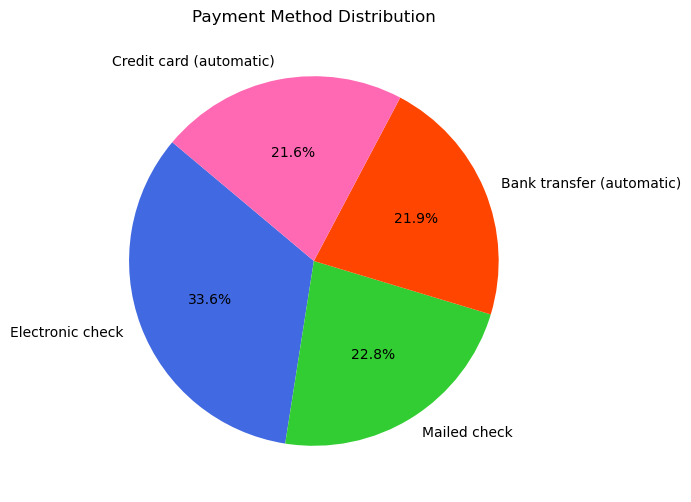

In [14]:
# Check the distribution of the 'PaymentMethod' column
payment_method_counts = df['PaymentMethod'].value_counts(normalize=True) * 100
payment_method_counts

# Let's recreate the pie chart using the actual data from the CSV file with the visual aesthetics as per the provided image.

# Define the colors for the pie chart to match the uploaded image
colors = ['#4169e1', '#32cd32', '#ff4500', '#ff69b4']

# Create the pie chart with the same visual aesthetics
plt.figure(figsize=(10, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Payment Method Distribution')
plt.show()

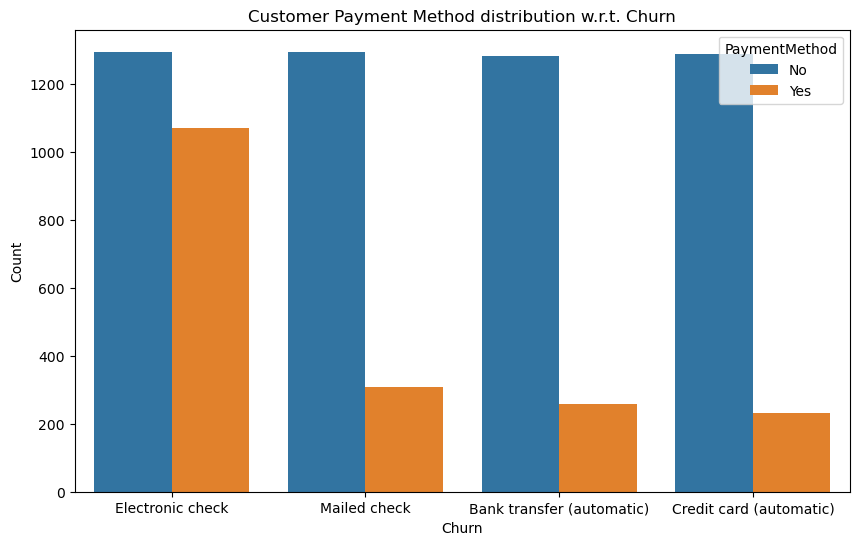

In [15]:
# Create a countplot for payment methods with respect to churn

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Customer Payment Method distribution w.r.t. Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PaymentMethod', loc='upper right')
plt.show()


<Figure size 1400x600 with 0 Axes>

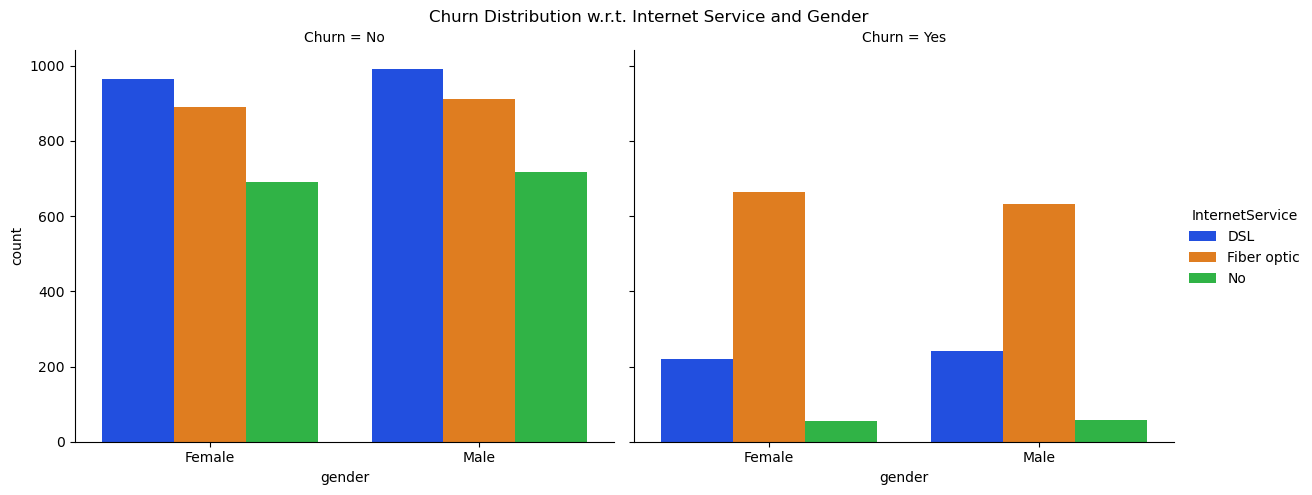

In [17]:
# Now let's create the required bar plot showing churn distribution with respect to internet service and gender.
# We will use 'catplot' from seaborn to create a facet grid that separates the churn 'Yes' and 'No' into different columns.

plt.figure(figsize=(14, 6))
sns.catplot(data=df, kind='count', x='gender', hue='InternetService', col='Churn',
            palette='bright', height=5, aspect=1.2)

plt.subplots_adjust(top=0.9)  # Adjust title space
plt.suptitle('Churn Distribution w.r.t. Internet Service and Gender')
plt.show()


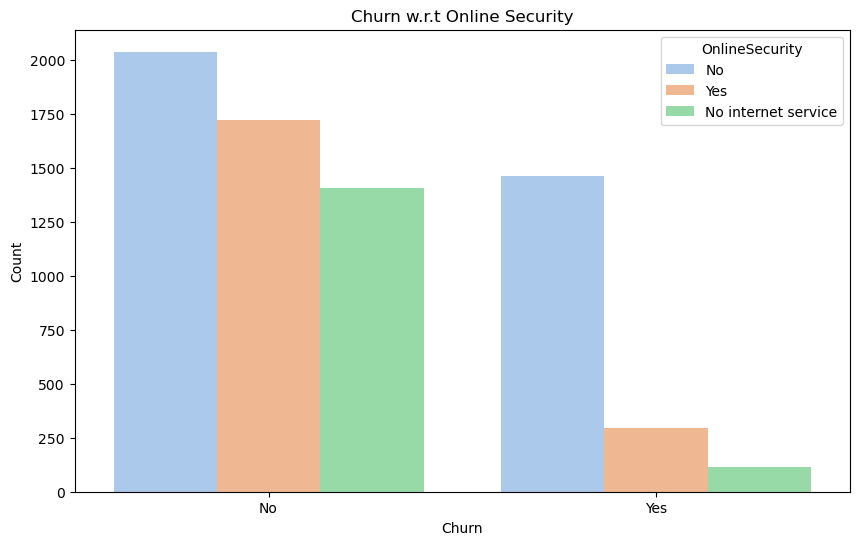

In [18]:
# Create a countplot for churn distribution with respect to online security

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette='pastel')
plt.title('Churn w.r.t Online Security')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='OnlineSecurity', loc='upper right')
plt.show()


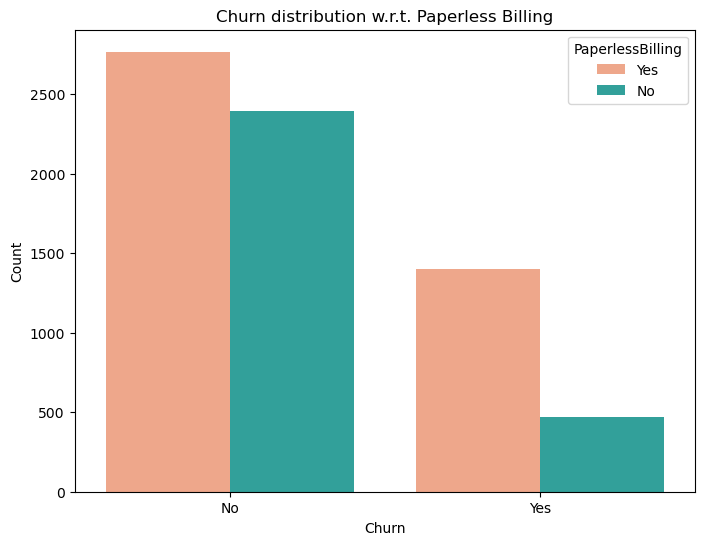

In [19]:
# Create a countplot for churn distribution with respect to paperless billing

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='PaperlessBilling', palette=['#FFA07A', '#20B2AA'])
plt.title('Churn distribution w.r.t. Paperless Billing')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PaperlessBilling', loc='upper right')
plt.show()


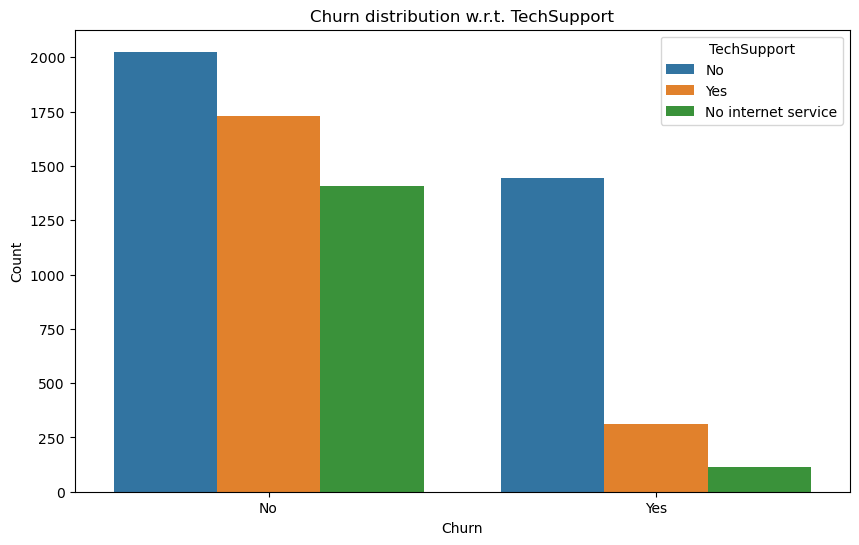

In [20]:
# Create a countplot for churn distribution with respect to tech support

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='TechSupport', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Churn distribution w.r.t. TechSupport')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='TechSupport', loc='upper right')
plt.show()


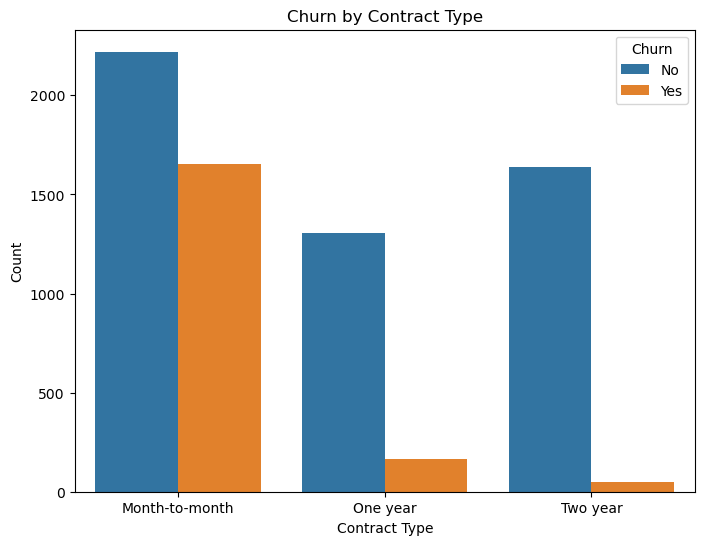

In [35]:
#Churn Ratio by Contract Type:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

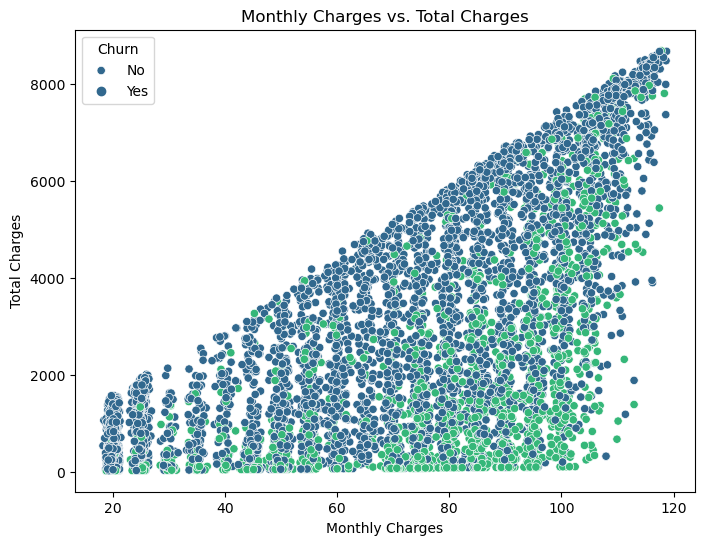

In [36]:
#Monthly Charges vs. Total Charges:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='viridis')
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

#Machine learning

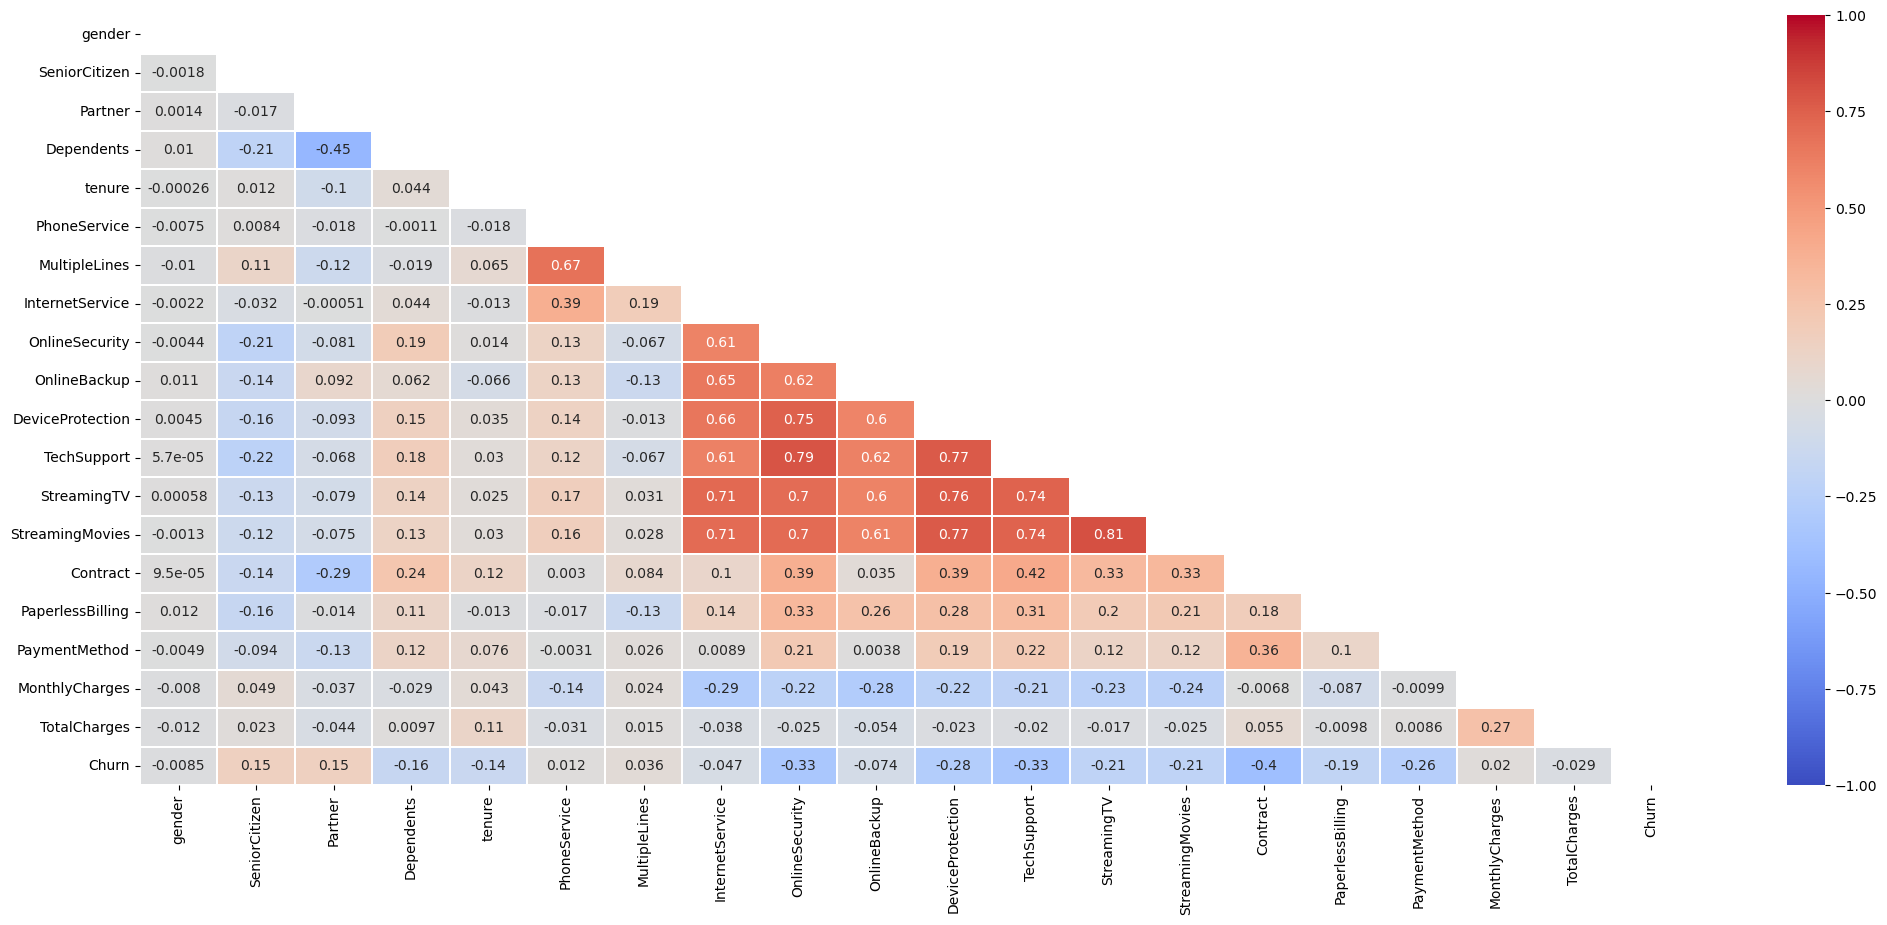

In [37]:
plt.figure(figsize=(25, 10))

 #The pd.factorize(x)[0] function assigns unique integer values to the distinct values in each 
#column of the DataFrame df. This is done to convert categorical or non-numeric data into a format 
#suitable for correlation calculations. It then calculates the correlation matrix for the factorized DataFrame.
correlation = df.apply(lambda x: pd.factorize(x)[0]).corr()
masking = np.triu(np.ones_like(correlation, dtype=bool))

ax = sns.heatmap(correlation, mask=masking, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

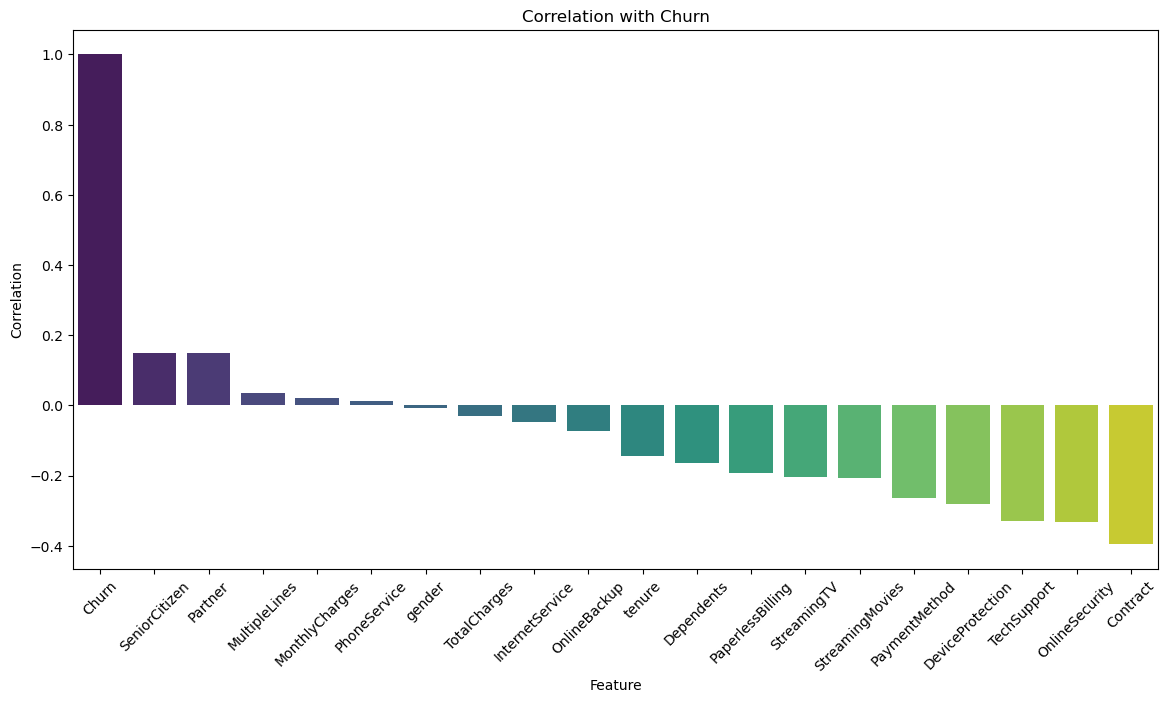

In [38]:


# Calculate the correlation with 'Churn' and sort the values
correlation = correlation['Churn'].sort_values(ascending=False)

# Create a bar chart to visualize the correlations
plt.figure(figsize=(14, 7))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlation with Churn')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()


##splitting data into X and Y

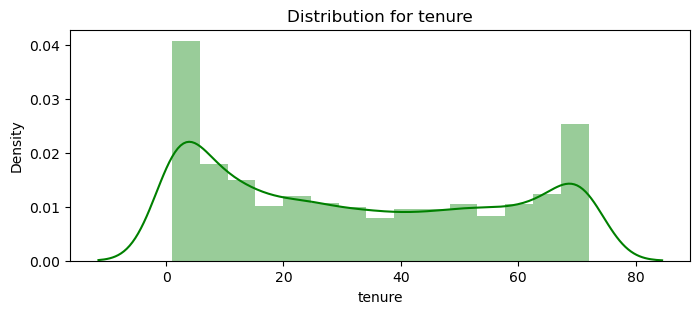

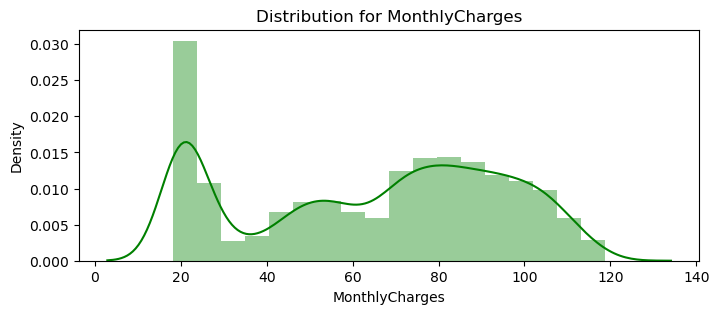

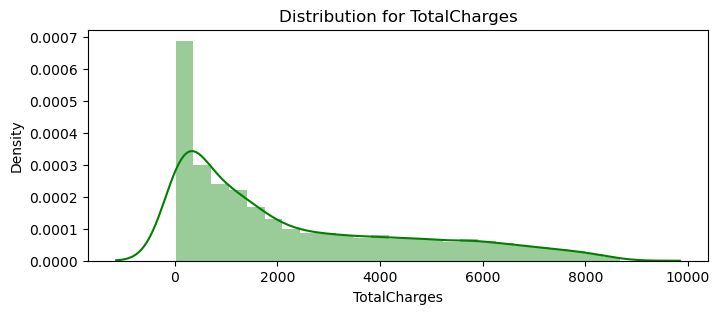

In [39]:

# Define a function to encode categorical data to integers
def encode_categorical_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_series = label_encoder.fit_transform(dataframe_series)
        return encoded_series
    else:
        # If the input Series is not of 'object' dtype, it is returned unchanged.
        return dataframe_series

# Load your dataset (replace 'your_data.csv' with your dataset)


# Define numeric and categorical columns
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

df = df.apply(lambda x: encode_categorical_to_int(x))
df.head()

# Create and display distribution plots for numeric columns
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)

for feat in num_cols:
    distplot(feat, df)

# Standardize numeric attributes
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols].astype('float64'))

# Split the data into features (X) and the target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

##KNN

Best k value: 16
Accuracy with best k value: 78.53%


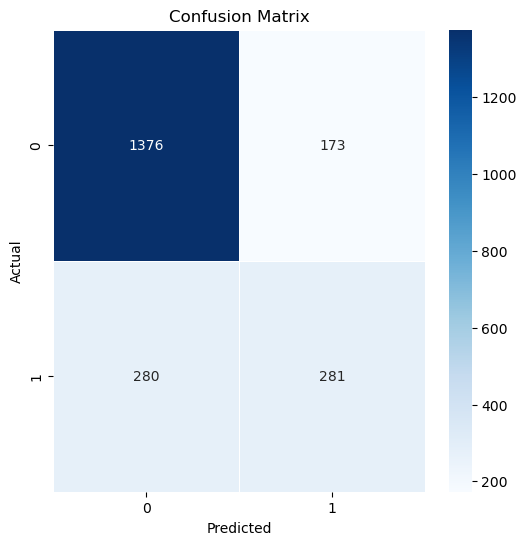

In [40]:

###KNN algorithm

# Define a range of k values to test (e.g., from 1 to 20)
k_values = list(range(1, 21))

# Create an empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the best k value that maximizes cross-validation accuracy
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Best k value:", best_k)

# Create and fit the final KNN model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_knn.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best k value: {:.2f}%".format(accuracy * 100))

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Epoch 1/10
124/124 [==============================] - 0s 832us/step - loss: 0.5021 - accuracy: 0.7457 - val_loss: 0.4267 - val_accuracy: 0.7970
Epoch 2/10
124/124 [==============================] - 0s 428us/step - loss: 0.4486 - accuracy: 0.7808 - val_loss: 0.4267 - val_accuracy: 0.8030
Epoch 3/10
124/124 [==============================] - 0s 426us/step - loss: 0.4471 - accuracy: 0.7805 - val_loss: 0.4222 - val_accuracy: 0.8041
Epoch 4/10
124/124 [==============================] - 0s 423us/step - loss: 0.4385 - accuracy: 0.7874 - val_loss: 0.4202 - val_accuracy: 0.8010
Epoch 5/10
124/124 [==============================] - 0s 420us/step - loss: 0.4337 - accuracy: 0.7841 - val_loss: 0.4219 - val_accuracy: 0.8051
Epoch 6/10
124/124 [==============================] - 0s 420us/step - loss: 0.4293 - accuracy: 0.7988 - val_loss: 0.4242 - val_accuracy: 0.8051
Epoch 7/10
124/124 [==============================] - 0s 418us/step - loss: 0.4276 - accuracy: 0.7976 - val_loss: 0.4216 - val_accuracy:

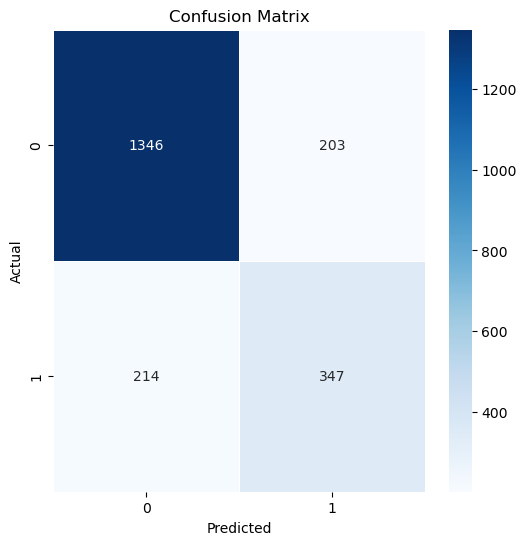

In [41]:
##Neural network

# Define your neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input shape based on the number of features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.795260663507109
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix:
 [[1381  168]
 [ 264  297]]


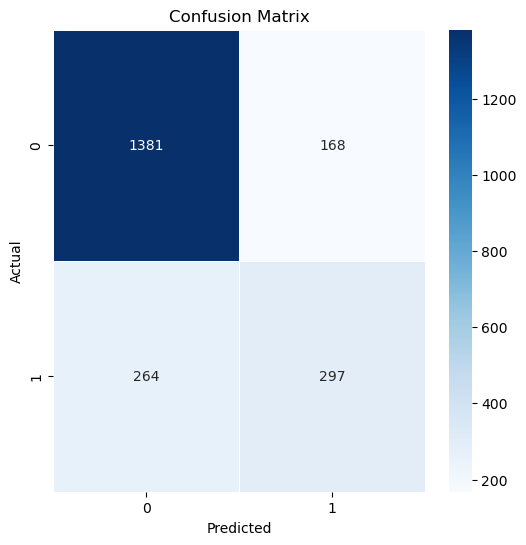

In [45]:
## Random Forests

# Create a Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on the training data
rf_class.fit(X_train, y_train)

# Make predictions
y_pred_test = rf_class.predict(X_test)


# Evaluate the model

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)


# Generate a classification report
classification_rep = classification_report(y_test, y_pred_test)
print(classification_rep)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision Tree accuracy is : 0.7274881516587678
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.51      0.50       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



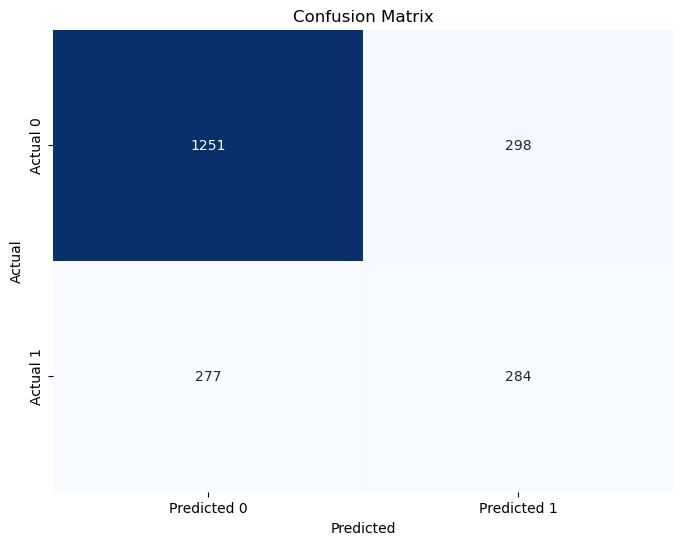

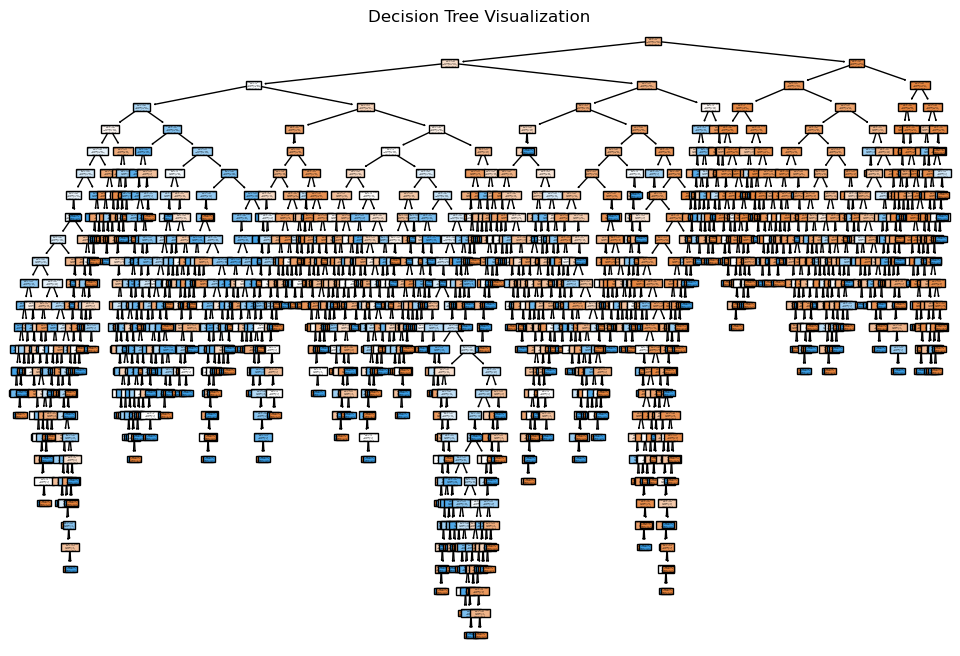

In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))


import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictdt_y)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()

In [49]:
###Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7639810426540284
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1549
           1       0.54      0.77      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.80      0.76      0.77      2110

Confusion Matrix:
[[1181  368]
 [ 130  431]]


In [51]:
#SGD Classifier model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the SGD Classifier model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7559241706161137
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1549
           1       0.78      0.11      0.20       561

    accuracy                           0.76      2110
   macro avg       0.77      0.55      0.53      2110
weighted avg       0.76      0.76      0.68      2110

Confusion Matrix:
[[1531   18]
 [ 497   64]]


Logistic Regression accuracy is : 0.8090047393364929
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



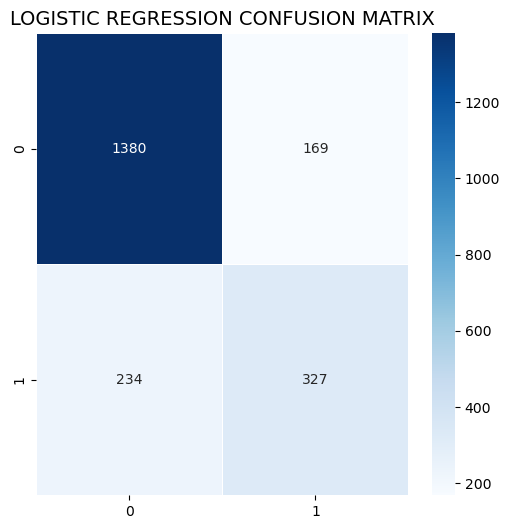

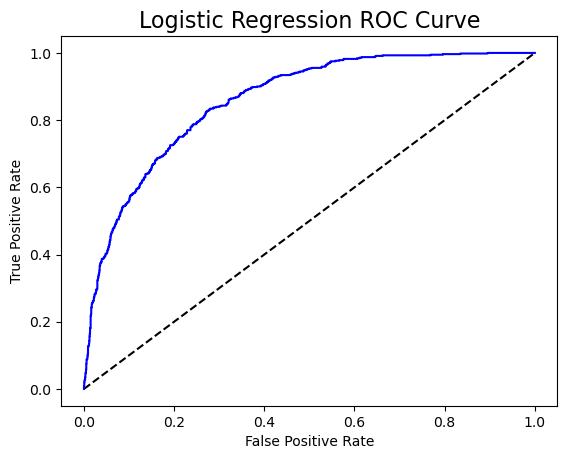

In [53]:
##Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",cmap="Blues",linewidths=.5)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [54]:
##Support Vector Machine

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

print(classification_report(y_test, predict_y))

SVM accuracy is : 0.8075829383886256
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110

